In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns   
import math
import time
from sklearn.model_selection import train_test_split
import random

In [2]:
pat = pd.read_csv('data/Churn_Modelling.csv')

In [3]:
pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
pat.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5801,5802,15659800,Teng,584,Spain,Female,50,1,0.00,1,0,1,152567.75,1
5307,5308,15728706,Amaechi,534,France,Female,49,7,0.00,1,1,0,13566.48,1
2587,2588,15601892,Hunter,563,France,Male,33,8,0.00,2,0,1,68815.05,0
9278,9279,15584580,Fyodorova,443,France,Male,35,6,161111.45,1,0,0,13946.66,0
9803,9804,15776558,Nicholls,673,France,Male,31,1,108345.22,1,0,1,38802.03,0


In [5]:
pat['only_1'] = 1

In [6]:
pat['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
pat['france'] = pat['Geography'] == 'France'
pat['spain'] = pat['Geography'] == 'Spain' 
pat['germany'] = pat['Geography'] == 'Germany'
pat['france'] = pat['france'].astype('int')
pat['spain'] = pat['spain'].astype('int')
pat['germany'] = pat['germany'].astype('int')
pat['gender'] = pat['Gender'] != "Female"
pat['gender'] = pat['gender'].astype('int')

In [8]:
pat.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'only_1', 'france',
       'spain', 'germany', 'gender'],
      dtype='object')

In [9]:
pat[["CreditScore", "gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "france", "spain", "germany", "only_1"]]

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,1
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0,1
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0,1
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0,1
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,0,1,1


In [10]:
pat.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,only_1,france,spain,germany,gender
5289,5290,15741195,Okechukwu,613,Spain,Male,19,5,0.00,1,1,1,176903.35,0,1,0,1,0,1
4786,4787,15749799,Pisani,577,France,Female,34,2,0.00,2,1,1,84033.35,0,1,1,0,0,0
7307,7308,15782159,Ndubuagha,850,France,Male,28,8,67639.56,2,1,1,194245.29,0,1,1,0,0,1
4152,4153,15662532,Holmes,757,Germany,Male,31,8,149085.90,2,1,1,197077.36,0,1,0,0,1,1
6435,6436,15754874,Nwoye,700,France,Male,26,4,119009.57,1,1,0,141926.43,0,1,1,0,0,1


In [11]:
x_train, x_test, y_train, y_test = train_test_split(pat[["CreditScore", "gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "france", "spain", "germany", "only_1"]], pat['Exited'], test_size=0.25, random_state=0)

In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, 2967 to 2732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7500 non-null   int64  
 1   gender           7500 non-null   int64  
 2   Age              7500 non-null   int64  
 3   Tenure           7500 non-null   int64  
 4   Balance          7500 non-null   float64
 5   NumOfProducts    7500 non-null   int64  
 6   HasCrCard        7500 non-null   int64  
 7   IsActiveMember   7500 non-null   int64  
 8   EstimatedSalary  7500 non-null   float64
 9   france           7500 non-null   int64  
 10  spain            7500 non-null   int64  
 11  germany          7500 non-null   int64  
 12  only_1           7500 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 820.3 KB


In [13]:
x_train.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0
mean,650.463867,0.541733,38.840000,4.974400,75661.289748,1.535333,0.707067,0.516933,100169.176911,0.507733,0.248267,0.244000,1.0
std,97.169199,0.498289,10.481704,2.889462,62651.999955,0.577809,0.455138,0.499746,57498.717199,0.499974,0.432036,0.429521,0.0
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,1.0
25%,583.000000,0.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51446.617500,0.000000,0.000000,0.000000,1.0
50%,652.000000,1.000000,37.000000,5.000000,96318.795000,1.000000,1.000000,1.000000,100067.820000,1.000000,0.000000,0.000000,1.0
75%,719.000000,1.000000,44.000000,7.000000,127311.990000,2.000000,1.000000,1.000000,149600.350000,1.000000,0.000000,0.000000,1.0
max,850.000000,1.000000,85.000000,10.000000,238387.560000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.0


In [14]:
# Normalise and store coeficients in dict
norm_dict_m = {}
norm_dict_s = {}

def normalise(df, cols):
    for col in cols:
        norm_dict_m[col] = df[col].mean()
        norm_dict_s[col] = df[col].std()
        df[col] = (df[col] - norm_dict_m[col]) / norm_dict_s[col]

def normalise_test(df, cols):
    for col in cols:
        df[col] = (df[col] - norm_dict_m[col]) / norm_dict_s[col]

In [15]:
normalise(x_train, ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'])

In [16]:
x_train.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,7.500000e+03,7500.000000,7.500000e+03,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.0
mean,-5.191699e-16,0.541733,-3.241259e-16,-4.831691e-17,7.484383e-17,1.535333,0.707067,0.516933,8.573882e-17,0.507733,0.248267,0.244000,1.0
std,1.000000e+00,0.498289,1.000000e+00,1.000000e+00,1.000000e+00,0.577809,0.455138,0.499746,1.000000e+00,0.499974,0.432036,0.429521,0.0
min,-3.092172e+00,0.000000,-1.988226e+00,-1.721566e+00,-1.207644e+00,1.000000,0.000000,0.000000,-1.741910e+00,0.000000,0.000000,0.000000,1.0
25%,-6.942927e-01,0.000000,-6.525657e-01,-1.029396e+00,-1.207644e+00,1.000000,0.000000,0.000000,-8.473678e-01,0.000000,0.000000,0.000000,1.0
50%,1.580885e-02,1.000000,-1.755440e-01,8.859781e-03,3.297182e-01,1.000000,1.000000,1.000000,-1.762768e-03,1.000000,0.000000,0.000000,1.0
75%,7.053278e-01,1.000000,4.922864e-01,7.010301e-01,8.244062e-01,2.000000,1.000000,1.000000,8.596918e-01,1.000000,0.000000,0.000000,1.0
max,2.053492e+00,1.000000,4.403864e+00,1.739286e+00,2.597304e+00,4.000000,1.000000,1.000000,1.736096e+00,1.000000,1.000000,1.000000,1.0


In [17]:
y_train = y_train + 1
y_train

2967    2
700     1
3481    1
1621    2
800     1
       ..
9225    1
4859    1
3264    1
9845    1
2732    2
Name: Exited, Length: 7500, dtype: int64

In [18]:
# Very Simple Approach, 1 input layer, 1 hidden layer, 1 output layer
# Neurons per layer = will adjust according to computational power

In [19]:
# activation function, we will use the relU function, f(x) = max(0, x)

In [20]:
def activation_function_relu(x):
    return np.vectorize(lambda x3: max(0,x3))(x)

In [21]:
x = np.array([1, 2, 3, 4, -1, -3])

In [22]:
np.vectorize(lambda x3: max(0,x3))(x)

array([1, 2, 3, 4, 0, 0])

In [23]:
def evaluate(weights, inputs):
    inputs = np.array(inputs).reshape(len(inputs), 1)
    return np.matmul(weights, inputs)
def apply_activation_func(inputs):
    return activation_function_relu(inputs)

In [24]:
# weights matrix = [features x neurons] for each layer
# incorporate the bias term in weights as an extra column and add an extra feature which always resolves to 1 in the data

In [25]:
# Use backpropogation(glorified GD) to find the right params and we end up with a classifier
# Use SGD

[[ 0.41171324 -0.14085659  0.16552672 -0.25697257  0.43057162]]
0
1
2
3
4
5
6
7
8
9
[[ 0.09377657 -0.16776862  0.83825101 -0.01756175 -0.08336709 -1.74167457
  -0.05541223 -2.54277334  0.0085699  -0.0385998   0.30688201  0.75526567
   1.94709947]
 [ 0.08035217  0.11260673  0.70031815 -0.02848616  0.05803102 -1.09810157
  -0.00396428 -0.48692158 -0.22905603 -0.54622748 -0.30241012  0.03052591
  -1.41637236]
 [ 0.03449525 -0.20897588  0.16462302 -0.09290528  0.20266443  1.5192745
   0.0509555  -0.32632944  0.05780144 -0.75481067 -0.81531952 -0.85781505
  -1.88500013]
 [ 0.02182114  0.33371223 -0.399888   -0.23279087 -0.03082144 -0.04235329
  -0.31043315 -0.12116629 -0.09669129  0.2244142   0.15325308 -0.10204783
  -0.32740003]]


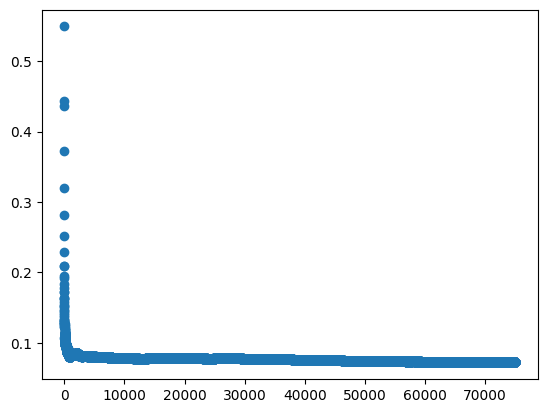

In [36]:
weights_h1= np.random.rand(4, 13) * math.sqrt(2.0 / 13)# 12 features + 1 bias term and 4 neurons
equalrand = np.vectorize(lambda x: x * random.choice([+1, -1]))
weights_h1 = equalrand(weights_h1)
# print(weights_h1)   
weights_o = np.random.rand(1, 5) * math.sqrt(2.0 / 5) * random.choice([+1, -1]) # 4 neuron output into 1 + 1 bias
weights_o = equalrand(weights_o)
print(weights_o)

# weights_h1= np.zeros((4, 13))
# weights_o = np.zeros((1, 5))

def train_rowwise(row, weights):
    outputs = evaluate(weights, row)
    return apply_activation_func(outputs)

allerrs = []
cumallerrs = []
sumall = 0
alpha = 0.1
backpropf = np.vectorize(lambda x: 0 if x <= 0 else 1)
for i in range(10):
    print(i)
    lst = list(zip(x_train.iterrows(), y_train.items()))
    random.shuffle(lst)
    for x_row, y_row in lst:
        outputs = train_rowwise(x_row[1], weights_h1)
        outputs = np.append(outputs, 1)
        output2 = train_rowwise(outputs, weights_o)
         # Now calculate backprop vals
        # Whereever outputs == 0 gradient is 0 in that direction else 1
        # for relu function

        err = (y_row[1] - output2)**2 / 2
        # print(err)
        allerrs.append(err)
        sumall += err
        cumallerrs.append(sumall / len(allerrs))
    
        # adjust weights based on alpha and this

        backprop_c = output2 - y_row[1]

        layer_prop_c = backprop_c * backpropf(output2)
        
        error_grad_op = layer_prop_c * outputs

        # print(error_grad_op)
        
        # Now calculate error term for hidden layer

        backprop_c = backprop_c * weights_o

        layer_prop_h_c = backprop_c * backpropf(outputs)

        # print(layer_prop_h_c)

        n_weights_h1 = np.zeros((4, 13))
        i = 0
        for err_n in n_weights_h1:
            n_weights_h1[i] = layer_prop_h_c[0][i] * x_row[1] 
            i+=1

        weights_o -= alpha * error_grad_op
        weights_h1 -= alpha * n_weights_h1

print(weights_h1)

plt.scatter([i for i in range(len(cumallerrs))], cumallerrs)

In [27]:
y_train

2967    2
700     1
3481    1
1621    2
800     1
       ..
9225    1
4859    1
3264    1
9845    1
2732    2
Name: Exited, Length: 7500, dtype: int64

In [28]:
y_test = y_test + 1

In [29]:
normalise_test(x_test, ['Age', 'CreditScore', 'Tenure', 'Balance', 'EstimatedSalary'])

In [30]:
x_test.describe()

,CreditScore,gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,france,spain,germany,only_1
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.0
mean,0.002673,0.557600,0.031216,0.053159,0.052646,1.514800,0.700800,0.509600,-0.005491,0.48240,0.246000,0.271600,1.0
std,0.978785,0.496771,1.002162,1.002893,0.982786,0.592893,0.457999,0.500008,1.001008,0.49979,0.430765,0.444874,0.0
min,-2.937802,0.000000,-1.988226,-1.721566,-1.207644,1.000000,0.000000,0.000000,-1.740545,0.00000,0.000000,0.000000,1.0
25%,-0.663419,0.000000,-0.652566,-0.683311,-1.207644,1.000000,0.000000,0.000000,-0.877218,0.00000,0.000000,0.000000,1.0
50%,0.010663,1.000000,-0.127842,0.008860,0.380710,1.000000,1.000000,1.000000,0.008837,0.00000,0.000000,0.000000,1.0
75%,0.653871,1.000000,0.492286,1.047115,0.840466,2.000000,1.000000,1.000000,0.833435,1.00000,0.000000,1.000000,1.0
max,2.053492,1.000000,5.071695,1.739286,2.796987,4.000000,1.000000,1.000000,1.735718,1.00000,1.000000,1.000000,1.0


In [31]:
ypred = []
yprednorm = []
for x_row in x_test.iterrows():
        outputs = train_rowwise(x_row[1], weights_h1)
        outputs = np.append(outputs, 1)
        output2 = train_rowwise(outputs, weights_o)
        ypred.append(output2[0, 0])
        yprednorm.append(1 if output2 < 1.5 else 2)

In [32]:
# print(ypred)
print(yprednorm)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yprednorm)

0.7964